True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
15 minutes
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
15 minutes
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
15 mins
True
True
True
True
True
True
True
True
True

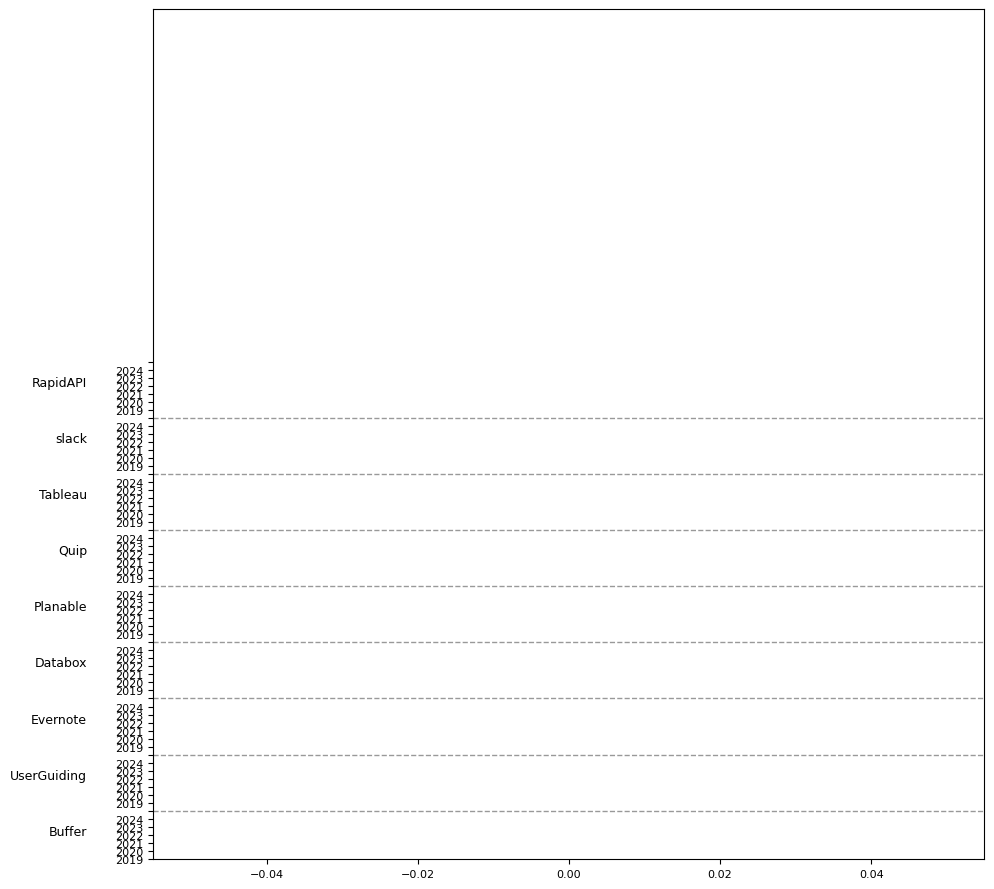

In [1]:
from dataset_generator import PricingsLoader
from matplotlib import pyplot as plt
from models import PricingManager

STUDIED_YEARS = ["2019", "2020", "2021", "2022", "2023", "2024"]
GROUP_SIZE = len(STUDIED_YEARS)+1

def get_data_from_dataset(dataset):
    data = {}
    max_plans = 0
    max_features = 0

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        if pricing.saas_name not in data:
            data[pricing.saas_name] = {year: None for year in STUDIED_YEARS}
        
        data[pricing.saas_name][pricing.year] = {}
        data[pricing.saas_name][pricing.year]["number_of_features"] = len(pricing.features)
        data[pricing.saas_name][pricing.year]["number_of_plans"] = len(pricing.plans)

        if len(pricing.features) > max_features:
            max_features = len(pricing.features)
        
        if len(pricing.plans) > max_plans:
            max_plans = len(pricing.plans)

    return data, max_plans, max_features

def format_data_for_visualization(data):
    formatted_data = {}
    data_items = list(data.items())
    
    for i in range(len(data)):
        start_y_pos = i*GROUP_SIZE
        end_y_pos = start_y_pos + GROUP_SIZE - 1
        saas = data_items[i][0]
        saas_details = data_items[i][1]
        formatted_data[saas] = {'plans': {'x': [], 'y': []}, 'features': {'x': [], 'y': []}}

        for j in range(start_y_pos, end_y_pos):
            formatted_data[saas]['plans']['x'].append(saas_details.get('number_of_plans', None))
            formatted_data[saas]['features']['x'].append(saas_details.get('number_of_features', None))
            formatted_data[saas]['plans']['y'].append(j)
            formatted_data[saas]['features']['y'].append(j)
    
    return formatted_data

def generate_figure(dataset):

    data, max_plans, max_features = get_data_from_dataset(dataset)
    formatted_data = format_data_for_visualization(data)

    ds_size = round(len(dataset)/6)

    x_tags = [i for i in range(1, max_plans + 1)] + ["  "] + [i for i in range(1, max_features + 1)]
    y_tags = (STUDIED_YEARS + ["  "])*ds_size

    x = range(max_plans + 1 + max_features)
    y = range(ds_size*7)

    fig, ax = plt.subplots(figsize=(10, ds_size))

    for _, values in formatted_data.items():
        ax.plot(values['plans']['x'], values['plans']['y'], marker='o', linestyle='-', color='r')
        ax.plot(values['features']['x'], values['features']['y'], marker='o', linestyle='-', color='r')
    
    ax.set_yticks(x, labels=x_tags)
    ax.set_yticks(y, labels=y_tags)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    yticks = ax.get_yticks()
    # Añadir etiquetas a grupos de 6 ticks
    for i in range(0, len(yticks), 7):
        # Asegurarse de que el índice no exceda el rango de yticks
        if i + 7 < len(yticks):
            group_label_position = (yticks[i] + yticks[i + 6]) / 2
        else:
            group_label_position = (yticks[i] + yticks[-1]) / 2
        
        separator_position = yticks[i-1]

        # Añadir la etiqueta del grupo
        ax.text(-0.08, group_label_position, list(formatted_data.keys())[i//7], transform=ax.get_yaxis_transform(),
                horizontalalignment='right', fontsize=9)
        
        if i > 0:  # No dibujar en el primer grupo
            ax.axhline(y=separator_position, color='grey', linestyle='--', linewidth=1, alpha=0.8)

    plt.tight_layout()
    plt.show()

dataset = PricingsLoader('../../pricings')
generate_figure(dataset)